In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')

warnings.filterwarnings("ignore")

# 1. 정규 분포

$X \sim N(\mu,\sigma^2)$

$
\begin{align}
f(x) = \dfrac{1}{\sigma\sqrt{2\pi}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
,\quad -\infty < x < \infty
\end{align}
$

$E(X) = \mu$

$Var(X) = \sigma^2$

평균값을 중심으로 하여 좌우대칭인 종 모양의 분포

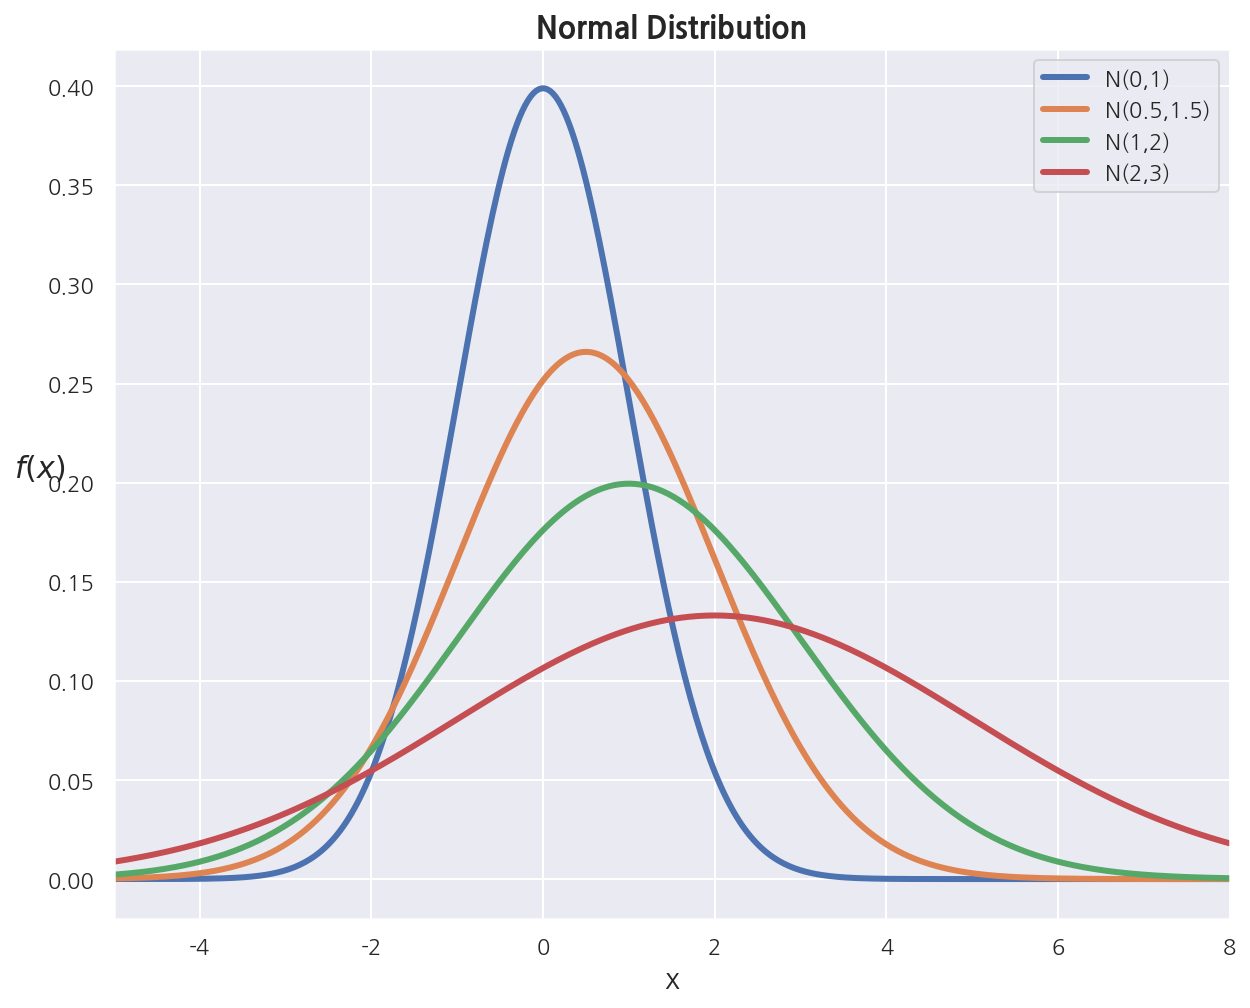

In [3]:
plt.figure(figsize=(10, 8))

x = np.linspace(-8, 8, 500)

y1 = stats.norm(0,1).pdf(x)      # 평균: 0,     분산: 1
y2 = stats.norm(0.5,1.5).pdf(x)  # 평균: 0.5,   분산: 1.5
y3 = stats.norm(1,2).pdf(x)      # 평균: 1,     분산: 3
y4 = stats.norm(2,3).pdf(x)      # 평균: 2,     분산: 4


for i in range(4):
    exec( "plt.plot(x, {0}, lw=3)".format("y"+str(i+1)))


plt.title("Normal Distribution", weight="bold", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.ylabel("$f(x)$", rotation = 0, fontsize=15)

plt.xlim(-5,8)
plt.legend(["N(0,1)", "N(0.5,1.5)", "N(1,2)", "N(2,3)"])

plt.show()

- 평균이 증가함에 따라 그래프가 우측으로 x축 이동한다.
- 분산이 증가함에 따라 흩어짐 정도가 커져 완만한 모습이 된다.

# 2. 이항 분포

$X \sim Bin(n,p)$

$
\begin{align}
p(x) = \binom n x \; p^x(1-p)^{n-x}
, \quad x=0, ... n
\end{align}
$

$E(X) = np$

$Var(X) = np(1-p)$

특정 사건이 발생할 확률이 p이고 n번 독립 시행하였을 때 사건이 x번 발생할 확률

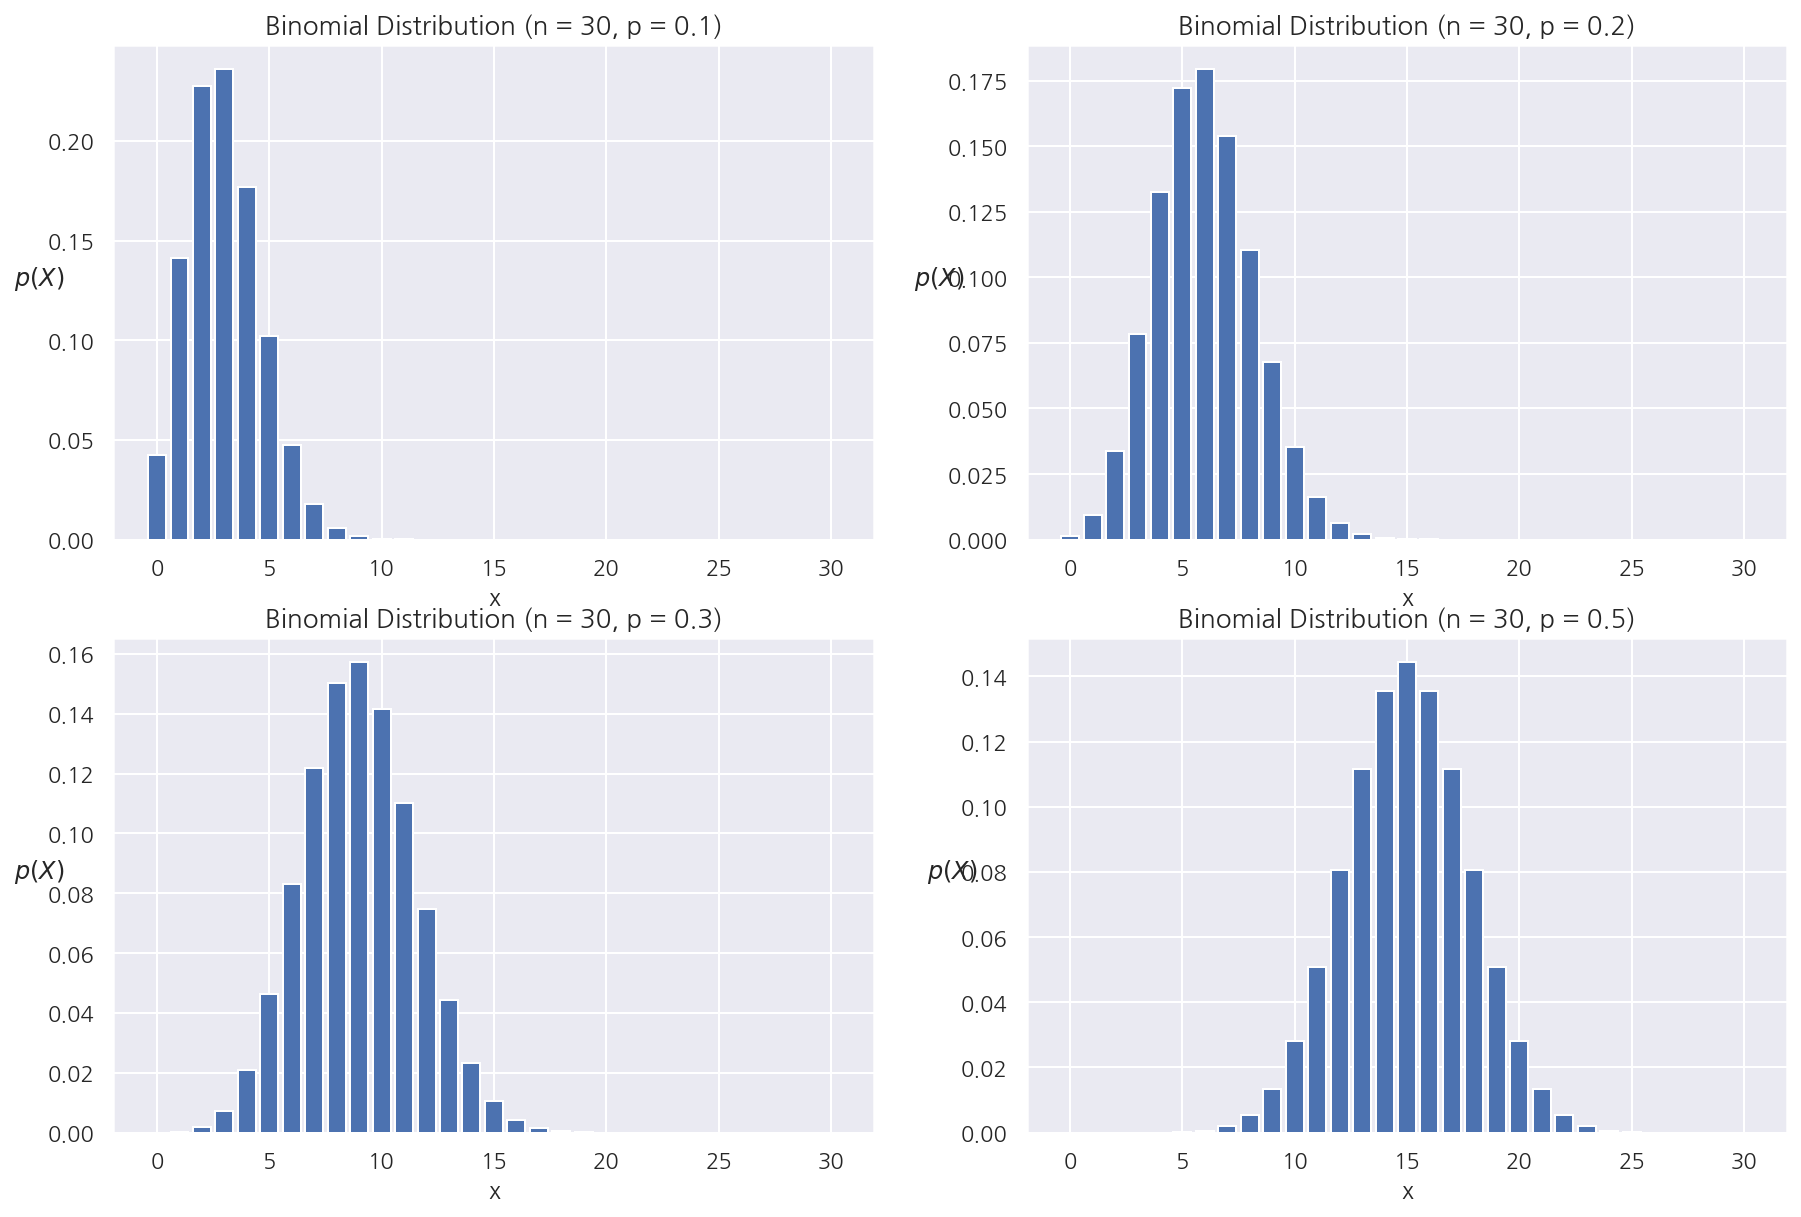

In [4]:
fig, axs = plt.subplots(2,2, figsize=(15,10))

p = np.array( [[0.1,0.2],
               [0.3,0.5]] )

x = range(0,31)

for row in range(2):
    for col in range(2):
        y = stats.binom(30, p[row,col]).pmf(x)
        
        axs[row,col].bar(x, y)
        axs[row,col].set_title("Binomial Distribution (n = 30, p = {0})".format(p[row,col]),
                                fontsize=13)
        axs[row,col].set_xlabel("x")
        axs[row,col].set_ylabel("$p(X)$", rotation=0)

        
plt.show()

- n을 고정하고 p를 증가시켰을 때 점차적으로 정규분포 형태와 근사하는 것을 알 수 있다.
- p가 0과 1에서 멀어질수록 정규분포와 근사한다.

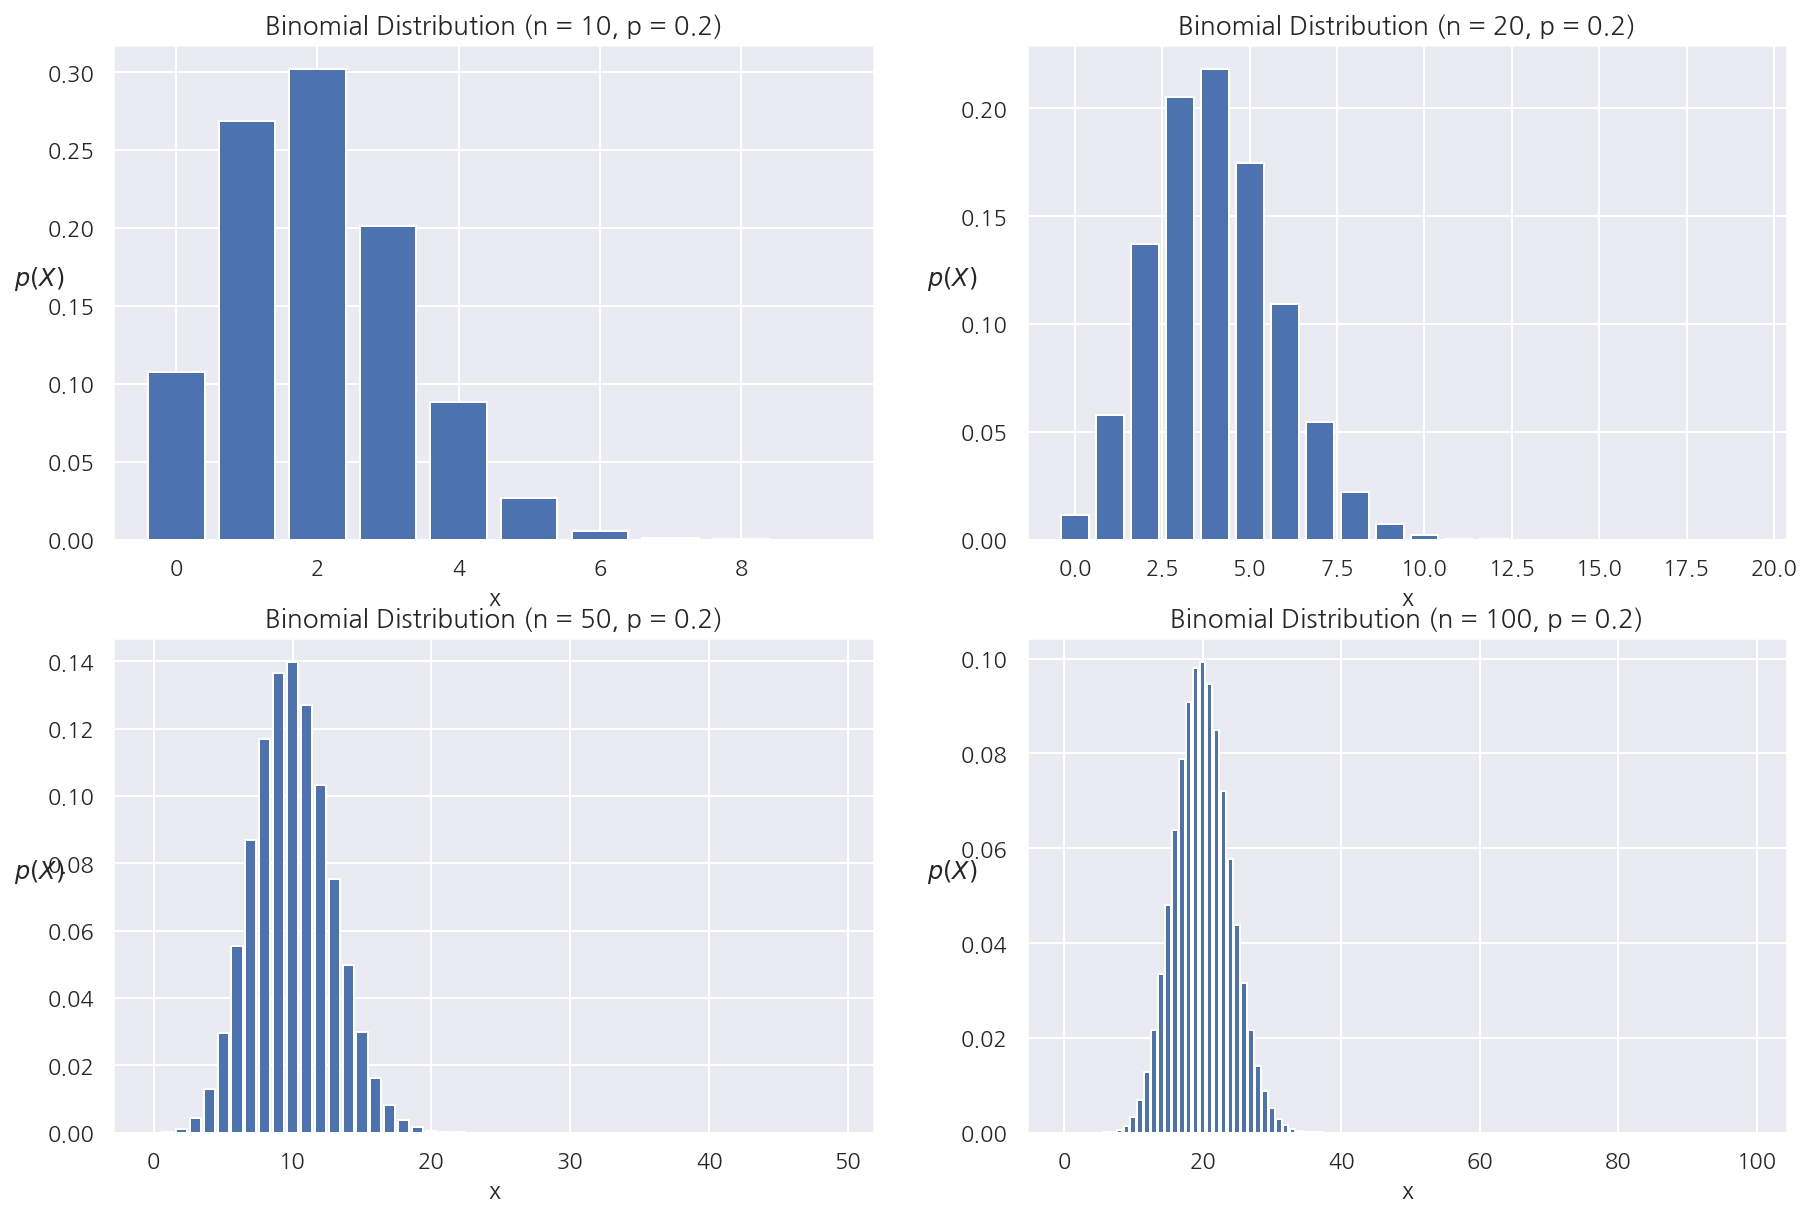

In [5]:
fig, axs = plt.subplots(2,2, figsize=(15,10))

n = np.array( [[10,20],
               [50,100]] )


for row in range(2):
    for col in range(2):
        x = list(range(0, n[row,col]))
        y = stats.binom(n[row,col], 0.2).pmf(x)
        
        axs[row,col].bar(x, y)
        axs[row,col].set_title("Binomial Distribution (n = {0}, p = 0.2)".format(n[row,col]),
                                fontsize=13)
        axs[row,col].set_xlabel("x")
        axs[row,col].set_ylabel("$p(X)$", rotation=0)

        
plt.show()

- p를 고정하고 n을 증가시켰을 때 점차적으로 정규분포 형태와 근사하는 것을 알 수 있다.
- 표본의 크기 n이 증가할수록 정규분포와 근사한다.

# 3. 포아송 분포

$X \sim Poisson(\lambda)$

$
\begin{align}
p(x) = e^{-\lambda} \ \dfrac{\lambda^x}{x!}
, \quad x=0, ... \infty
\end{align}
$

$E(X) = \lambda$

$Var(X) = \lambda$

주어진 시간 또는 영역에서 어떤 사건의 평균발생횟수 $\lambda$를 알고 있을때 사건이 x번 발생할 확률

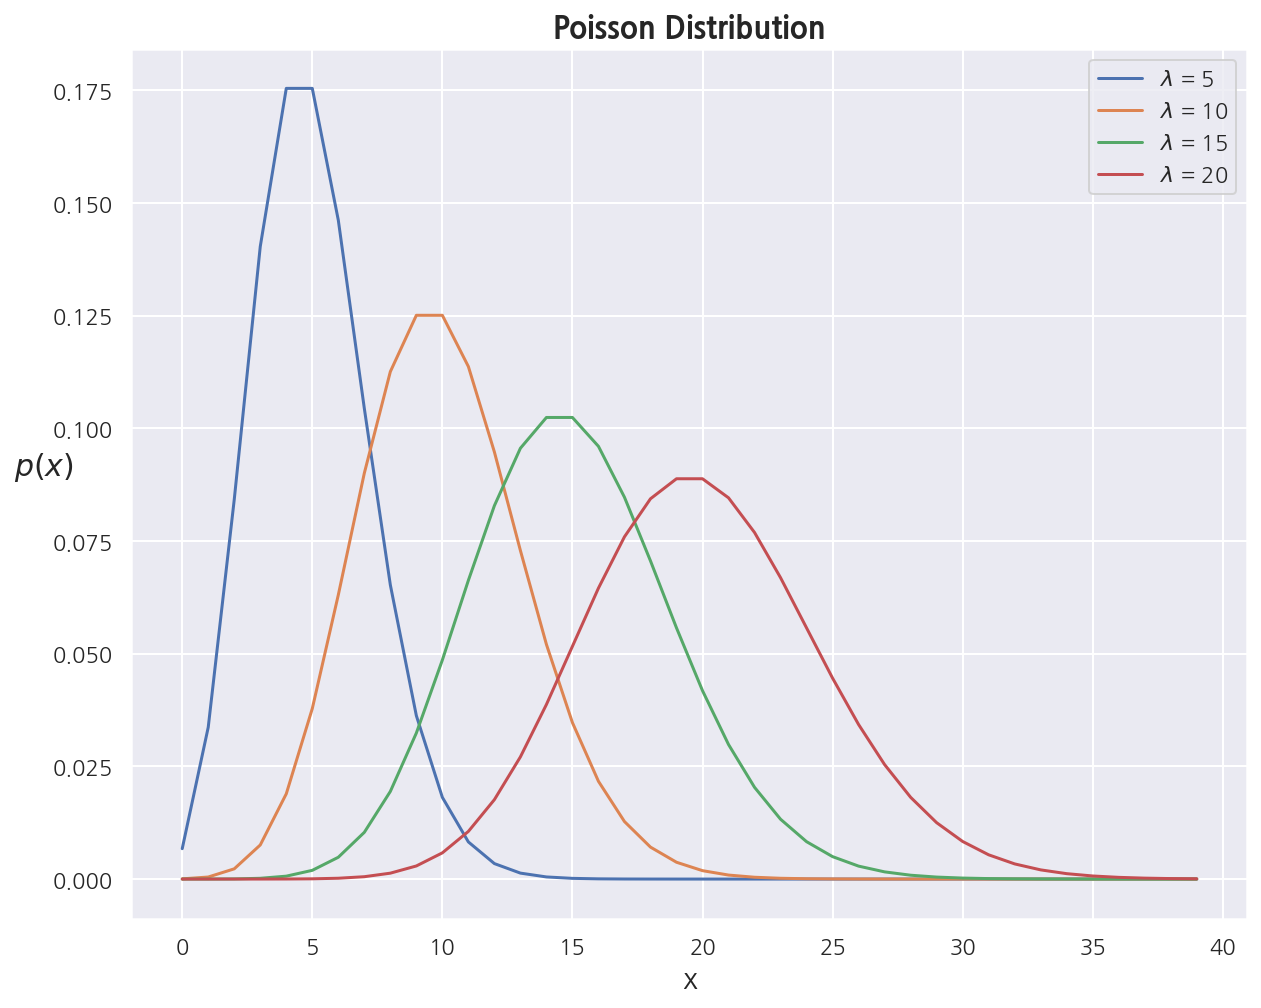

In [6]:
x = np.arange(40)

plt.figure(figsize=(10, 8))

for lam in np.linspace(5,20,4):
    y = stats.poisson(lam).pmf(x)
    plt.plot(x, y, label = f"$\lambda$ = {int(lam)}")

plt.title('Poisson Distribution', weight="bold", fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel("$p(x)$", rotation = 0, fontsize=15)
plt.legend()

plt.show()

- 포아송분포는 평균과 분산이 같으므로 $\lambda$가 증가함에 따라 우측으로 이동하면서 완만해지는 모습이다.

# 4. 지수 분포

$X \sim \exp(\lambda)$

$
\begin{align}
f(x) = \dfrac{1}{\lambda}  e^{-\frac{1}{\lambda}x}
, \quad 0 < x < \infty
\end{align}
$

$E(X) = \lambda$

$Var(X) = \lambda^2$

사건과 사건사이 평균시간 $\lambda$를 알고 있을 때 특정 사건이 1회 발생하기까지 걸리는 시간

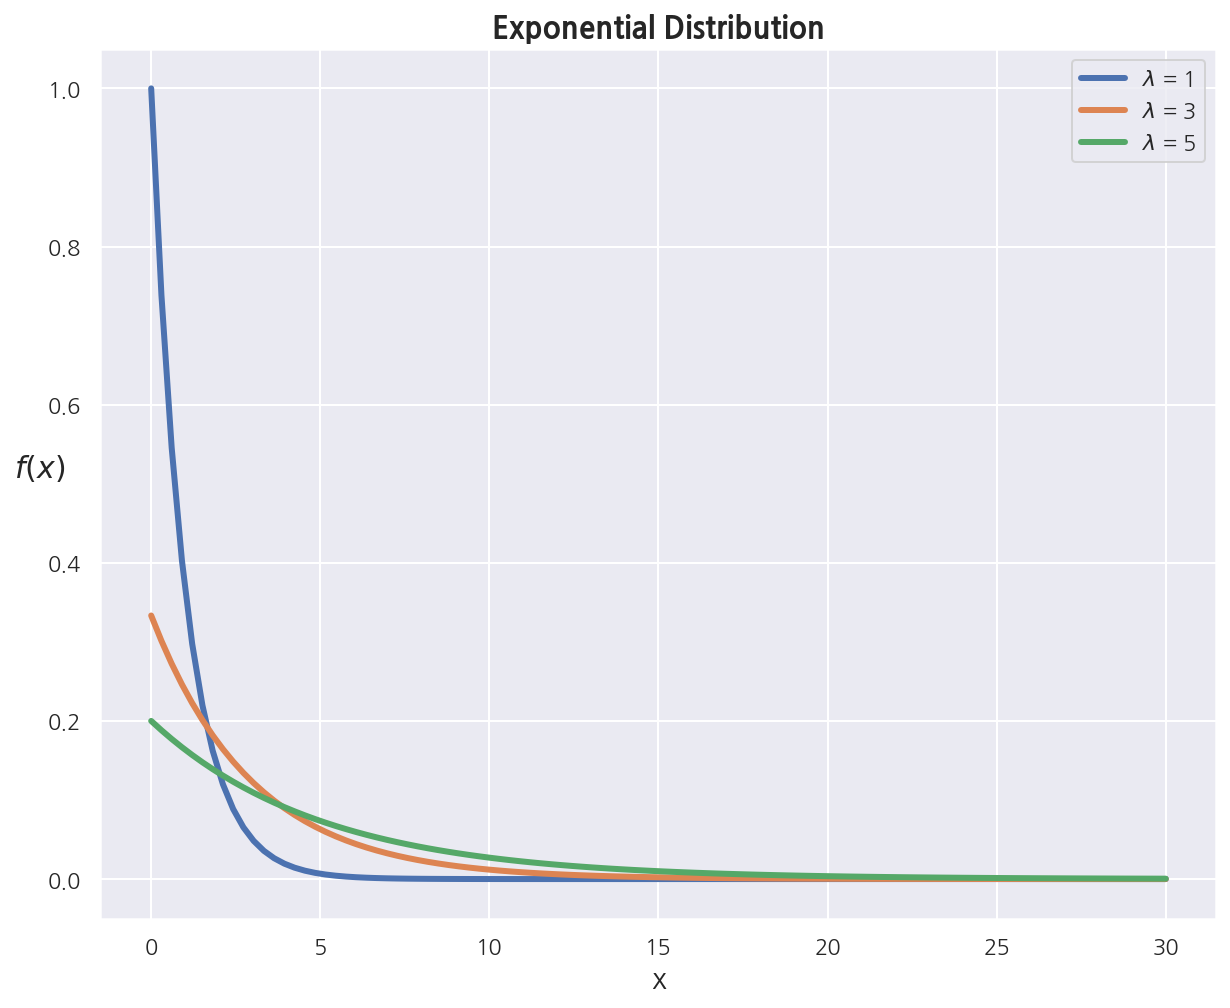

In [7]:
x = np.linspace(0, 30, 100)

plt.figure(figsize=(10, 8))

for lam in [1, 3, 5]:
    loc = 0
    y = stats.expon(loc, lam).pdf(x)
    plt.plot(x, y, label = f"$\lambda$ = {lam}", lw=3)

plt.title('Exponential Distribution', weight="bold", fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel("$f(x)$", rotation = 0, fontsize=15)
plt.legend()

plt.show()

- $\lambda$가 증가함에 따라 분포가 완만해지는 모습이다.

# 5. 카이제곱 분포

$X \sim \chi^2 (k)$

$
\begin{align}
f(x) = C_k \ x^{\frac{k}{2}-1} \exp\left(-\dfrac{x}{2}\right)
, \quad 0 < x < \infty
\end{align}
$

$E(X) = k$

$Var(X) = 2k$

$k$는 자유도이며 $C_k = 1 \ / \ {\Gamma(\frac{k}{2}) 2^{\frac{k}{2}}}$이다.

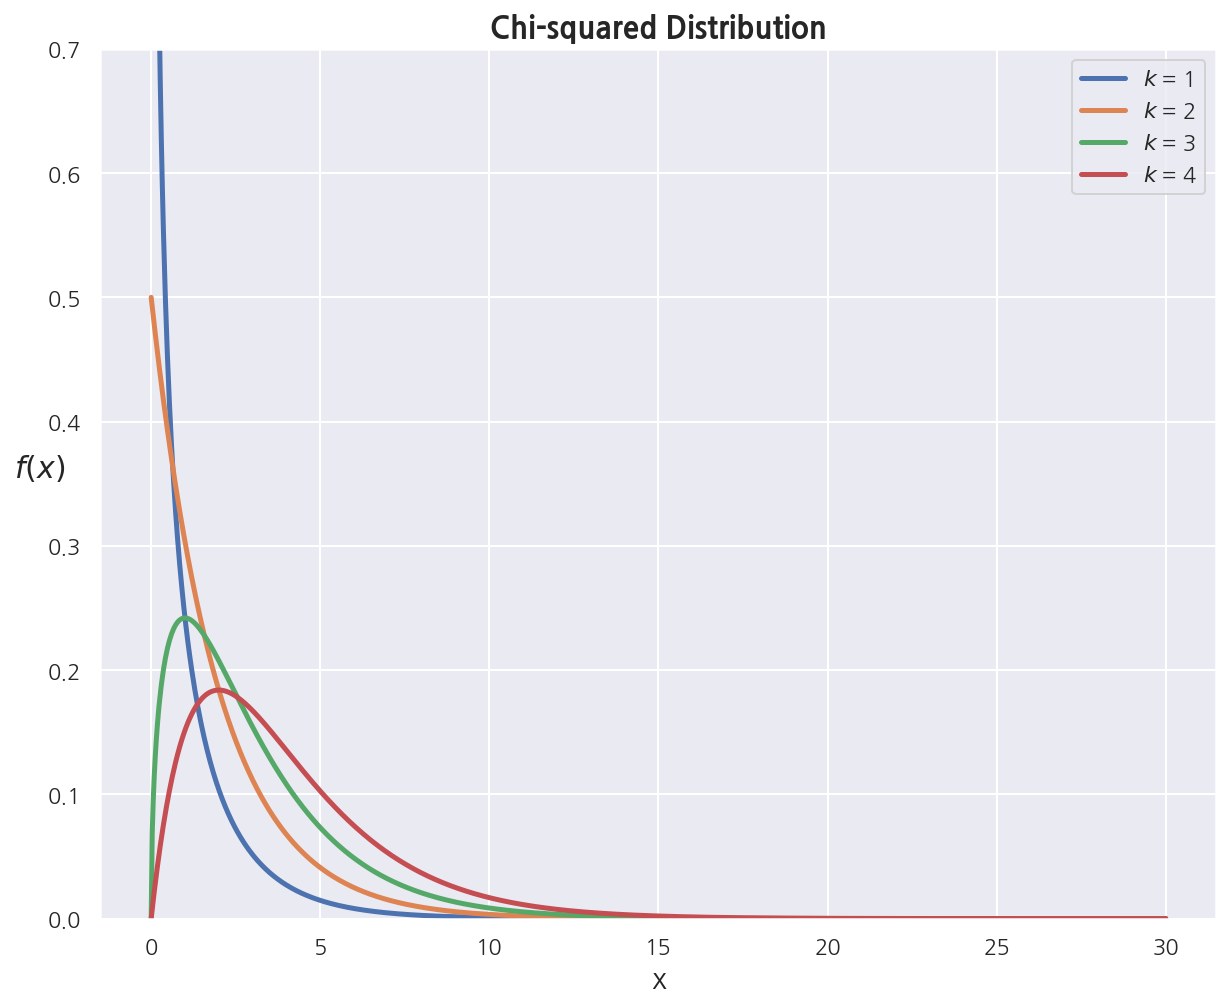

In [8]:
x = np.linspace(0, 30, 1000)

plt.figure(figsize=(10, 8))

for df in range(4):
    y = stats.chi2(df+1).pdf(x)
    plt.plot(x, y, label = f"$k$ = {df+1}", lw=2.5)

plt.title('Chi-squared Distribution', weight="bold", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.ylabel("$f(x)$", rotation = 0, fontsize=15)

plt.ylim(0,0.7)
plt.legend()

plt.show()

- 자유도가 1,2인 경우 x값이 증가함에 따라 확률밀도가 작아지는 형태이다.
- 자유도가 2인 경우 $\lambda = 2$인 지수분포가 된다.
- 자유도가 3보다 커지면 단봉형태가 된다.

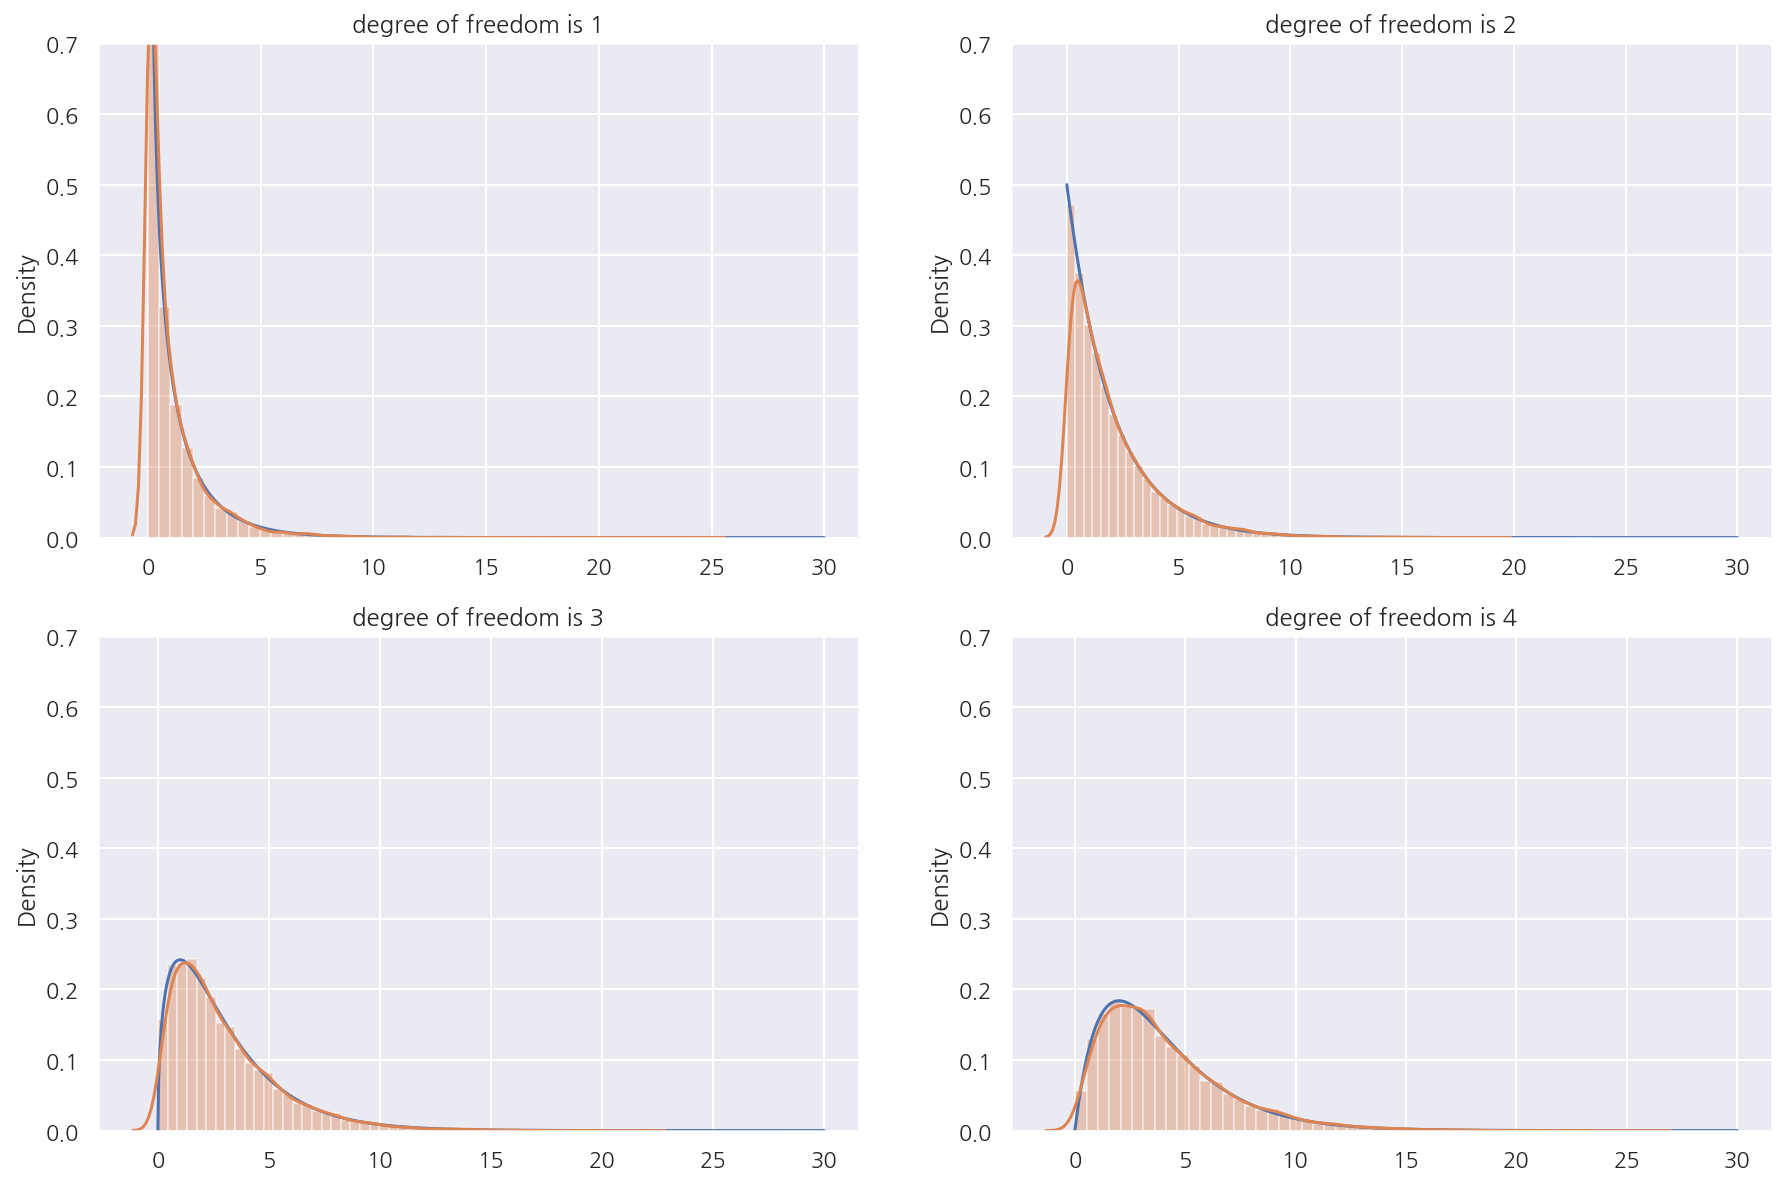

In [9]:
fig, axs = plt.subplots(2,2, figsize=(15,10))


N = np.arange(4).reshape(2,2) + 1 # 표본집단 수 = 카이제곱 자유도
n = 10000 # 각 표본 샘플수


for row in range(2):
    for col in range(2):
        z_square = []
        
        # N개 표본집단의 표준정규분포 제곱합 (샘플수 = n)
        for _ in range(n): 
            z = stats.norm().rvs(N[row,col])
            z_square.append((z*z).sum())


        # 카이제곱 분포 그리기
        x = np.linspace(0, 30, 1000)
        y = stats.chi2(N[row,col]).pdf(x)
        axs[row,col].plot(x, y)
        axs[row,col].set_ylim(0,0.7)

        # 표준정규분포 제곱합 그리기
        sns.distplot(z_square, ax=axs[row,col])

        axs[row,col].set_title(f"degree of freedom is {N[row,col]}")


plt.show()

$
\begin{align}
\sum_{i=1}^k Z_i^2 \sim \chi^2 (k)
\end{align}
$

- 표준정규분포의 제곱합은 카이제곱분포를 따른다.

# 6. 감마 분포

$X \sim \Gamma(\alpha,\beta \ )$

$
\begin{align}
f(x) = \dfrac{1}{\Gamma{(\alpha}) \beta^\alpha} x^{\alpha-1} \exp\left(-\dfrac{x}{\beta}\right)
, \quad 0 < x < \infty
\end{align}
$

$E(X) = \alpha\beta$

$Var(X) = \alpha\beta^2$

사건과 사건사이 평균시간 $\beta$를 알고 있을 때 특정 사건이 $\alpha$회 발생하기까지 걸리는 시간
- $\alpha$: shape parameter
- $\beta$: scale parameter

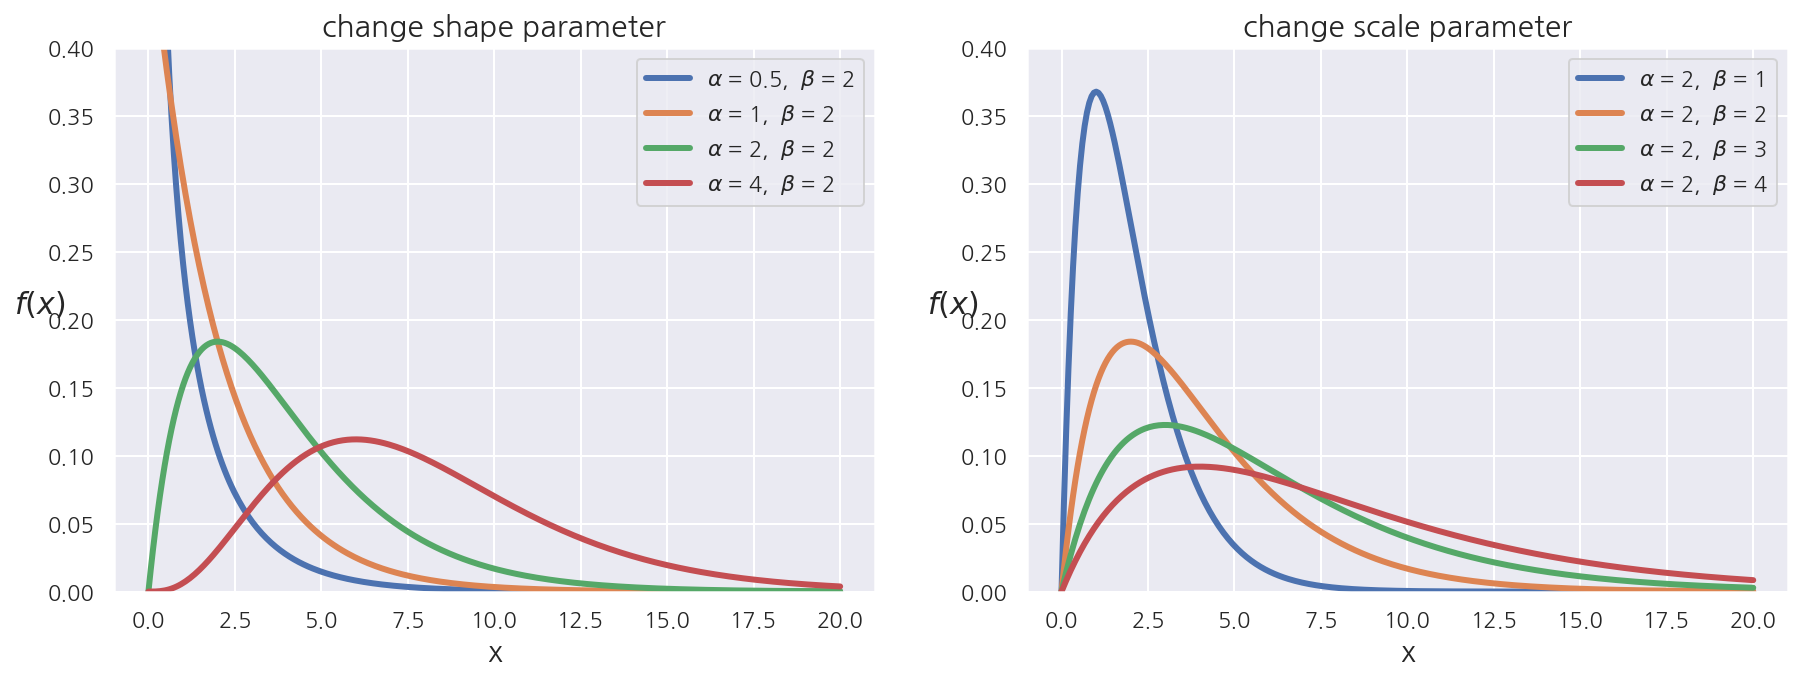

In [10]:
x = np.linspace(0,20, 300)

def Gamma_plot(alpha,beta,plot_loc):
    loc = 0
    shape = alpha
    scale = beta
    y = stats.gamma(shape, loc, scale).pdf(x)
    axs[plot_loc].plot(x, y, label = f"$\\alpha$ = {shape},  $\\beta$ = {scale}", lw=3)
    
fig, axs = plt.subplots(1,2, figsize=(15,5))    


for a in [0.5,1,2,4]:
    Gamma_plot(a, 2, 0)
    axs[0].set_ylim(0,0.4)
    axs[0].set_xlabel('x', fontsize=15)
    axs[0].set_ylabel("$f(x)$", rotation = 0, fontsize=15)
    axs[0].set_title('change shape parameter', fontsize=15)
    axs[0].legend()
        
for b in [1,2,3,4]:
    Gamma_plot(2, b, 1)
    axs[1].set_ylim(0,0.4)
    axs[1].set_xlabel('x', fontsize=15)
    axs[1].set_ylabel("$f(x)$", rotation = 0, fontsize=15)
    axs[1].set_title('change scale parameter', fontsize=15)
    axs[1].legend()
    
plt.show()

- $\alpha$가 1보다 작은경우에는 x가 0에 가까울수록 높은 밀도를 가지며 1보다 큰경우는 값이 증가할수록 정규분포와 유사한 형태를 띈다.
  
  
- $\beta$가 증가할수록 분포가 넓게 퍼지는 형태를 띈다.

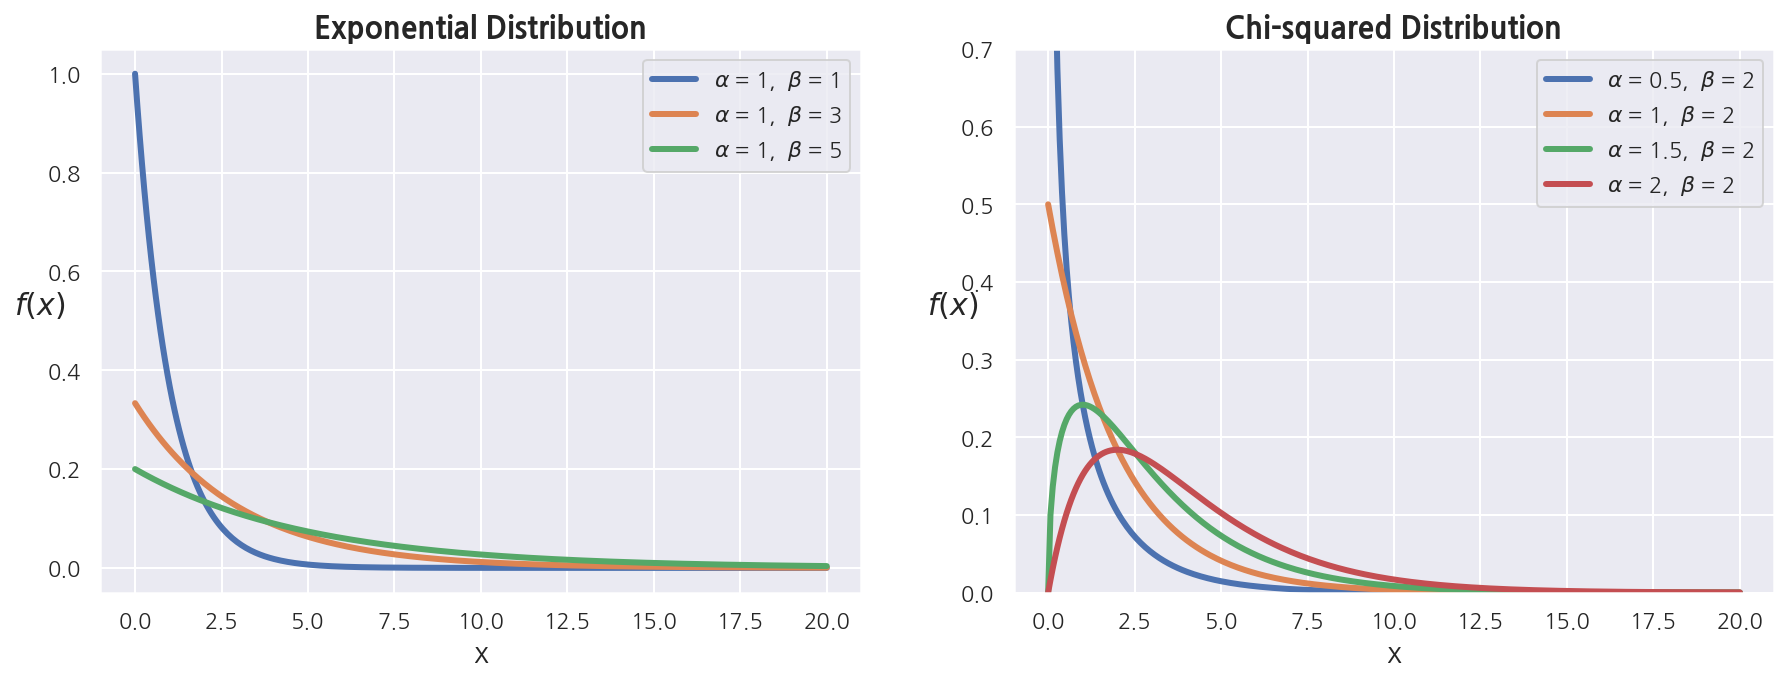

In [11]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

# 감마분포로 지수분포 그리기
for b in [1,3,5]:
    Gamma_plot(1, b, 0)
    axs[0].set_xlabel('x', fontsize=15)
    axs[0].set_ylabel("$f(x)$", rotation = 0, fontsize=15)
    axs[0].set_title('Exponential Distribution', fontsize=15, weight="bold")
    axs[0].legend()

# 감마분포로 카이제곱분포 그리기
for a in [0.5, 1, 1.5, 2]:
    Gamma_plot(a, 2, 1)
    axs[1].set_ylim(0,0.7)
    axs[1].set_xlabel('x', fontsize=15)
    axs[1].set_ylabel("$f(x)$", rotation = 0, fontsize=15)
    axs[1].set_title('Chi-squared Distribution', fontsize=15, weight="bold")
    axs[1].legend()

- 감마분포에서 $\alpha$ = 1인 경우 $\lambda$ = $\beta$를 모수로 갖는 지수분포가 된다.
- 감마분포에서 $\beta$ = 2 이고, $\alpha$가 양의 정수 $k$인 경우 자유도가 $\dfrac{k}{2}$인 카이제곱분포가 된다.

# 7. Student - t분포

$V \sim \chi^2(n), \quad X = \dfrac{Z}{\sqrt{V/n}} \sim T(n)$

$
\begin{align}
f(x) = \frac{1}{\sqrt{n\pi}}\frac{\Gamma\left(\frac{n+1}{2}\right)} {\Gamma\left(\frac{n}{2}\right)} \left(1+\frac{x^2}{n} \right)^{-\frac{n+1}{2}}
, \quad -\infty < x < \infty
\end{align}
$

$E(X) = 0$

$Var(X) = \dfrac{n}{n-2}$

표준정규분포와 마찬가지로 평균값을 중심으로 하여 좌우대칭인 종 모양의 분포

꼬리부분이 표준정규분포보다 약간 두터우며 이는 t-분포가 표준정규분포보다 변동성이 더 크다는 것을 의미한다.

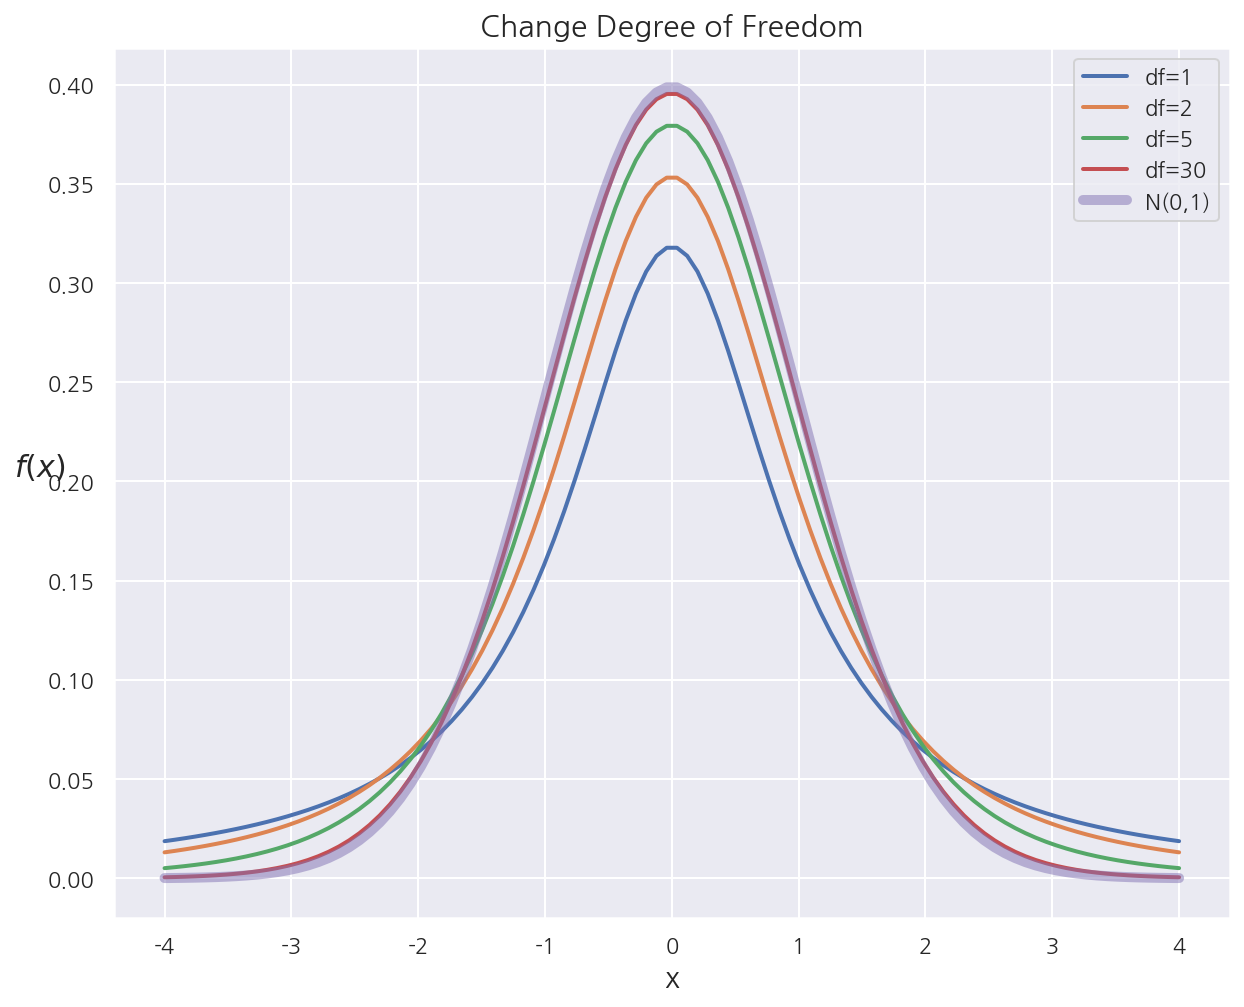

In [12]:
x = np.linspace(-4, 4, 100)

plt.figure(figsize=(10, 8))

# t분포
for df in [1, 2, 5, 30]:
    y = stats.t(df).pdf(x)
    plt.plot(x, y, label=(f"df={df}"), lw=2)

# 정규분포
plt.plot(x, stats.norm().pdf(x), label="N(0,1)", lw=5, alpha=0.5)

plt.title("Change Degree of Freedom", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.ylabel("$f(x)$", rotation = 0, fontsize=15)

plt.legend()

plt.show()

- 자유도가 커질수록 정규분포에 근사하는 것을 확인 할 수 있다.


- 일반적으로 실제 자료에서 모분산을 알 수 없기에 표본표준편차를 사용하여 정규화시 다음과 같이 자유도가 n-1인 T분포를 따르며 

  표본의 수가 커지면 정규분포에 근사한다.
  
$
\begin{align}
T = \frac{\bar{X} - \mu}{S \ /\sqrt{n}} \ 
= \frac{\frac{\bar{X} - \mu}{\sigma\sqrt{n}}} {{\sqrt{\frac{(n-1)S^2}{(n-1)\sigma^2}}} \ }
= \frac{Z}{\sqrt{\frac{\chi^2_{(n-1)}}{n-1}}}
\sim \ T(n-1) \
\approx \ Z
\end{align}
$

# 8. F 분포

$
\begin{align}
V_1 \sim \chi^2(n_1),\, V_2 \sim \chi^2(n_2),
\quad \quad X = \frac{\frac{V_1}{n_1}}{\frac{V_2}{n_2}} \sim F(n_1, n_2)
\end{align}
$

$ 
\begin{align}
f(x) = \dfrac{\sqrt{\dfrac{(n_1\,x)^{n_1}\,\,n_2^{n_2}} {(n_1\,x+n_2)^{n_1+n_2}}}} {x\;\text{B}\left(\frac{n_1}{2},\frac{n_2}{2}\right)},
\quad 0 < x < \infty
\end{align}
$

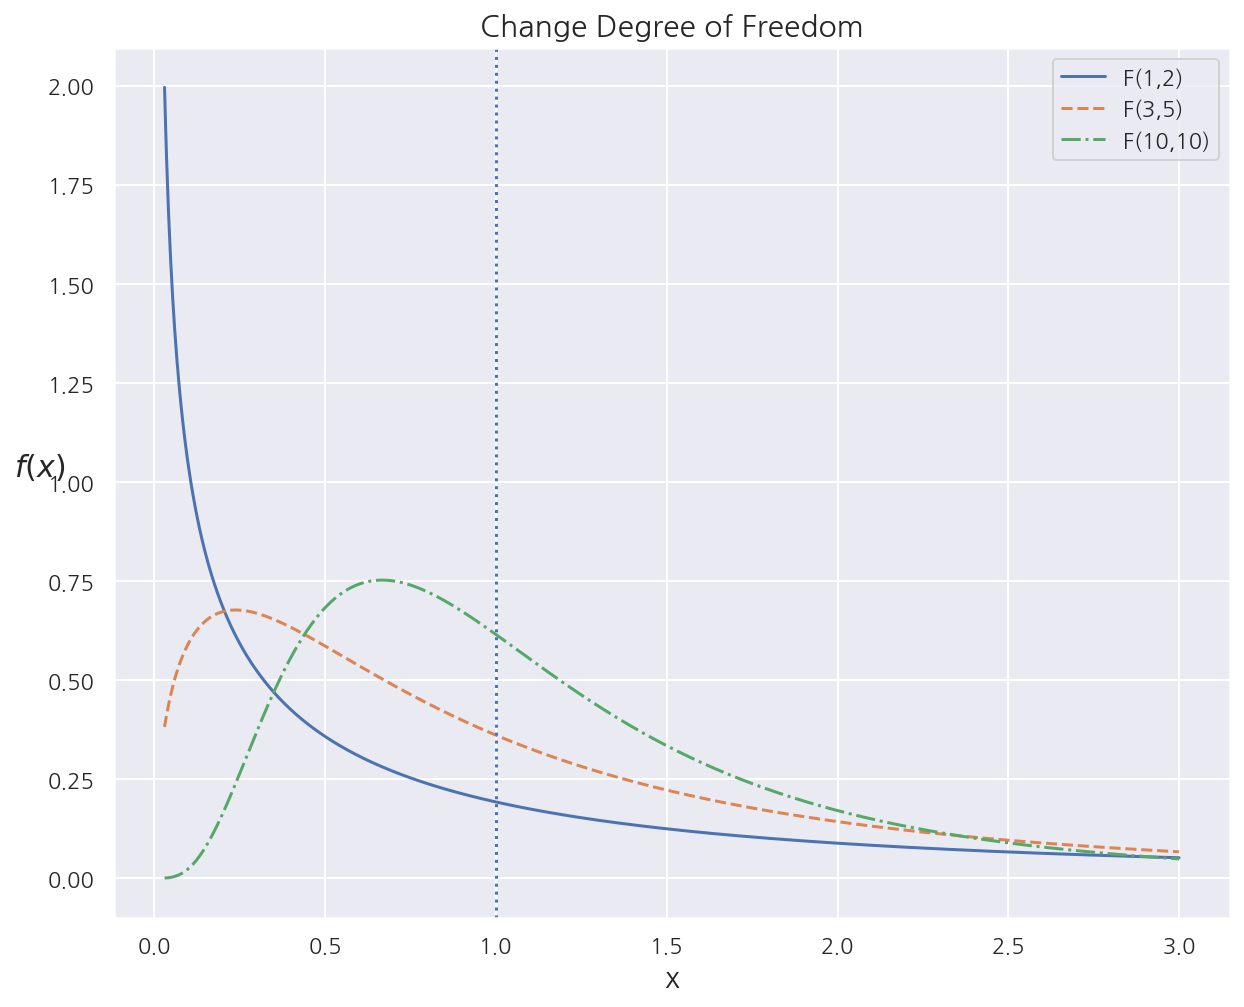

In [13]:
x = np.linspace(0.03, 3, 1000)

plt.figure(figsize=(10, 8))

plt.plot(x, stats.f(1, 2).pdf(x), ls="-", label="F(1,2)")
plt.plot(x, stats.f(3, 5).pdf(x), ls="--", label="F(3,5)")
plt.plot(x, stats.f(10, 10).pdf(x), ls="-.", label="F(10,10)")

plt.axvline(1, ls=":")

plt.title("Change Degree of Freedom", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.ylabel("$f(x)$", rotation = 0, fontsize=15)
plt.legend()

plt.show()